# The Central Limit Theorem

Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 8)
import numpy as np
import pandas as pd
import dsci345 as dsci # for dsci.pretty() below

rng = np.random.default_rng()

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\cov}{\text{cov}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\cov` and `\sd` in LaTeX below.

# Estimating means

Suppose we have lots of observations of something and want to estimate the mean
(i.e., the mean value of the source we're getting the observations from).
"Obviously", we should use the *sample mean*:
$$ \bar X = \frac{1}{n} \left( X_1 + X_2 + \cdots + X_n \right) . $$

Let's suppose that all the $X_i$ are independent copies of some random variable,
and that
$$  \E[X_i] = \mu \qquad \text{and} \qquad \var[X_i] = \sigma^2 .$$

We'd like to infer the value of $\mu$.

Is this a sensible thing to do? Well,
by linearity of $\E[ ]$,
$$\begin{aligned}
    \E[\bar X]
    &=
    \E[ \frac{1}{n} \left( X_1 + \cdots + X_n \right) ]
    \\ &=
    \frac{1}{n} \left( \E[X_1] + \cdots + \E[X_n] \right)
    \\ &=
    \frac{1}{n} \left( \mu + \cdots + \mu \right)
    \\ &=
    \mu .
\end{aligned}$$

Okay, that's a good sign? But, it's nice to know how far off it would be in practice.


To see how far off it would tend to be, let's compute the standard deviation;
as usual, it's easier to compute the variance (then we take the square root).
Since the $X_i$ are independent, the variance of their sum is the sum of their variances,
and also $\var[a X] = a^2 \var[X]$,
so
$$\begin{aligned}
    \var[\bar X]
    &=
    \var[ \frac{1}{n} \left( X_1 + \cdots + X_n \right) ]
    \\ &=
    \frac{1}{n^2} \left( \var[X_1] + \cdots + \var[X_n] \right)
    \\ &=
    \frac{\sigma^2}{n} .
\end{aligned}$$

So,
$$ \sd[\bar X] = \frac{\sigma}{\sqrt{n}} . $$ 

**Example:**

One "experiment": the average of `n=100` samples (each of a Binomial(10, 0.3)):

In [19]:
n = 100
X = rng.binomial(10, 0.3, size=n)
print(f"sample mean = {np.mean(X)}, mu = {10 * 0.3}")

sample mean = 3.16, mu = 3.0


Ten "experiments": the same thing, ten different times:

In [22]:
np.array([np.mean(rng.binomial(10, 0.3, size=n)) for _ in range(10)])

array([3.09, 3.08, 2.88, 2.71, 2.94, 3.05, 3.13, 3.1 , 2.84, 2.99])

A histogram of the output of 1000 "experiments" (which is humped up around 3, and spreads out between 2.6 and 3.4):

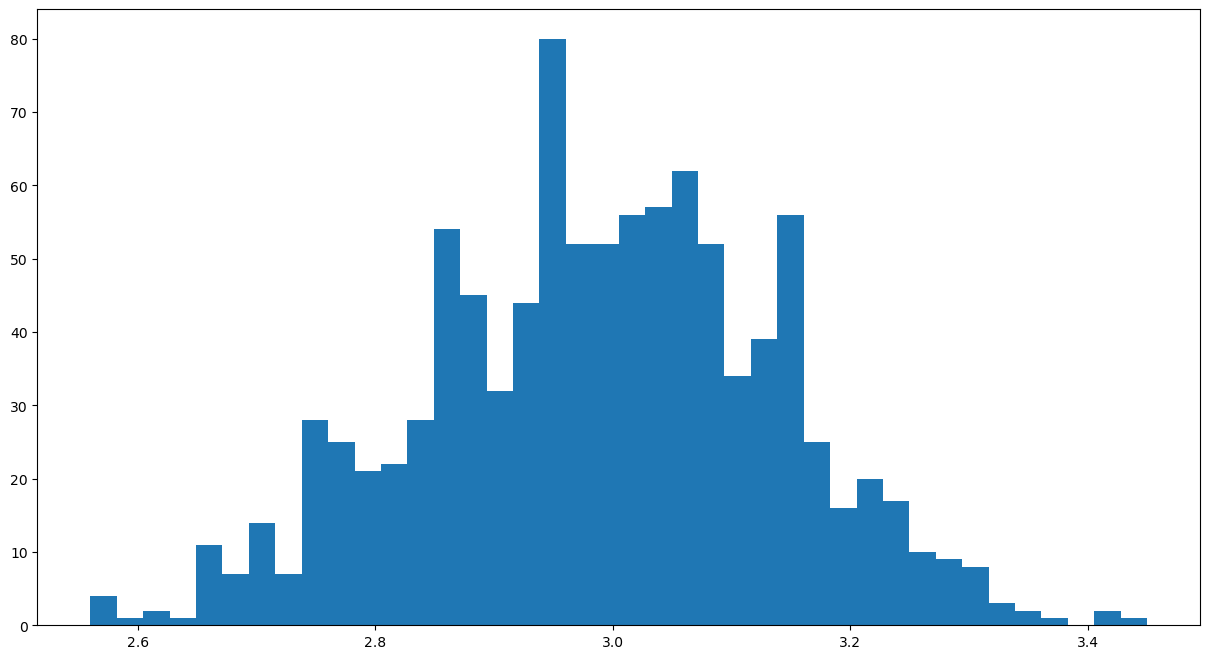

In [23]:
fig, ax = plt.subplots()
sample_means = [
    np.mean(rng.binomial(10, 0.3, size=n))
    for _ in range(1000)
]

ax.hist(sample_means, bins=40);

We've learned that $\bar X$ is an unbiased estimator of $\mu$,
with an error of order $\sigma/\sqrt{n}$.

**Next:** can we say more about the error? *Yes*, amazingly.

*Exercise:* check this, by
(a) taking the mean of 100 random draws;
and then (b) taking the mean of 10000 random draws;
the second should be 10x closer to the true mean on average.

# Aside: covariance

That's if the observations are *independent*;
what if they aren't? Consider the *covariance*:
$$ \cov[X,Y] = \E[(X - \E[X])(Y -\E[Y])] . $$
This is a measure of "how much do $X$ and $Y$ tend to go up and down (relative to their means) together".

As with the variance, this is equal to
$$  \cov[X, Y] = \E[XY] - \E[X]\E[Y]. $$
In fact, $\var[X] = \cov[X,X]$.

Two useful facts:

1. *Covariance is bilinear*: 
    $$ \cov[ a X + Y, Z ] = a \; \cov[X, Z] + \cov[Y, Z] .$$

2. If $X$ and $Y$ are independent, then $\cov[X,Y] = 0$.

So, what happens to $\bar X$ if all $X_i$ have the same distribution, but $\cov[X_i, X_j] = v$?
$$\begin{aligned}
\var[\bar X]
&=
\var[(X_1 + \cdots + X_n)/n]
\\ &=
\frac{1}{n^2}\cov[(X_1 + \cdots + X_n), (X_1 + \cdots + X_n)]
\\ &=
\frac{1}{n^2} \sum_{ij} \cov[X_i, X_j]
\\ &=
\frac{1}{n^2} \left(
    \sum_i \var[X_i] + \sum_{i \neq j} \cov[X_i, X_j]
\right)
\\ &=
\frac{1}{n^2} \left(
    n \sigma^2 + n(n-1) v
\right)
\\ &=
\frac{\sigma^2}{n} + \left(1 - \frac{1}{n}\right) v .
\end{aligned}$$

# The central limit theorem

The **central limit theorem** says that* if $\bar X = (X_1 + \cdot + X_n)/n$
is the sample mean of $n$ independent random variables
that each have mean $\mu$ and standard deviation $\sigma$,
then
$$
    \P\left\{
        \frac{ \bar X - \mu }{ \sigma / \sqrt{n} }
        > 
        x
    \right\}
    \approx
    \int_x^\infty \frac{e^{-y^2 / 2}}{\sqrt{2 \pi}} dy ,
$$
i.e., $\bar X$ has a distribution that is approximation Normal,
with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

$^*$ *note:* the approximation is better the bigger $n$ is
and the "less weird" the distribution of $X_i$ is.

How big, and how weird? Good question - an easy answer comes by simulation.

It **also** says that* if $S = X_1 + \cdot + X_n$
is the *sum* of $n$ independent random variables
that each have mean $\mu$ and standard deviation $\sigma$,
then
$$
    \P\left\{
        \frac{ S - n\mu }{ \sigma \sqrt{n} }
        > 
        x
    \right\}
    \approx
    \int_x^\infty \frac{e^{-y^2 / 2}}{\sqrt{2 \pi}} dy ,
$$
i.e., $S$ has a distribution that is approximation Normal,
with mean $n\mu$ and standard deviation $\sigma \sqrt{n}$.

Both just say "the distribution of the sum of independent things is Normal, with a mean and SD you can work out".

# Adding up lots of little things

We've talked about the Central Limit Theorem,
a.k.a., "Normal approximation" or "Gaussian approximation".
Let's see how to works in practice!

## Random walk

Let's suppose we take a walk as follows:
flip a fair coin; if heads, go one step north; if tails, go one step south.
Let $X_k = +1$ if we go north of the $k^\text{th}$ step, and $X_k = -1$ if we go south,
and $S_n = X_1 + X_2 + \cdots + X_n$ be the displacement to the north after $n$ steps.

Note that
$$ \E[X_k] = 0 \qquad \text{and} \qquad \sd[X_k] = 1 , $$
so
$$ \E[S_n] = 0 \qquad \text{and} \qquad \sd[S_n] = \sqrt{n} . $$

*Exercise:* make up another story about what $S_n$ is.

Let's investigate. Here's the first and last few values of a walk of length 100:

In [24]:
n = 100
X = rng.choice([-1, 1], size=n, replace=True)
S = np.cumsum(X)
S[:5], S[-5:]

(array([ 1,  0, -1, -2, -1]), array([12, 11, 12, 13, 14]))

and, a line showing the path of the walk (x-axis is time; y-axis is where the walk is; wiggly and sawtoothed; goes up and down):

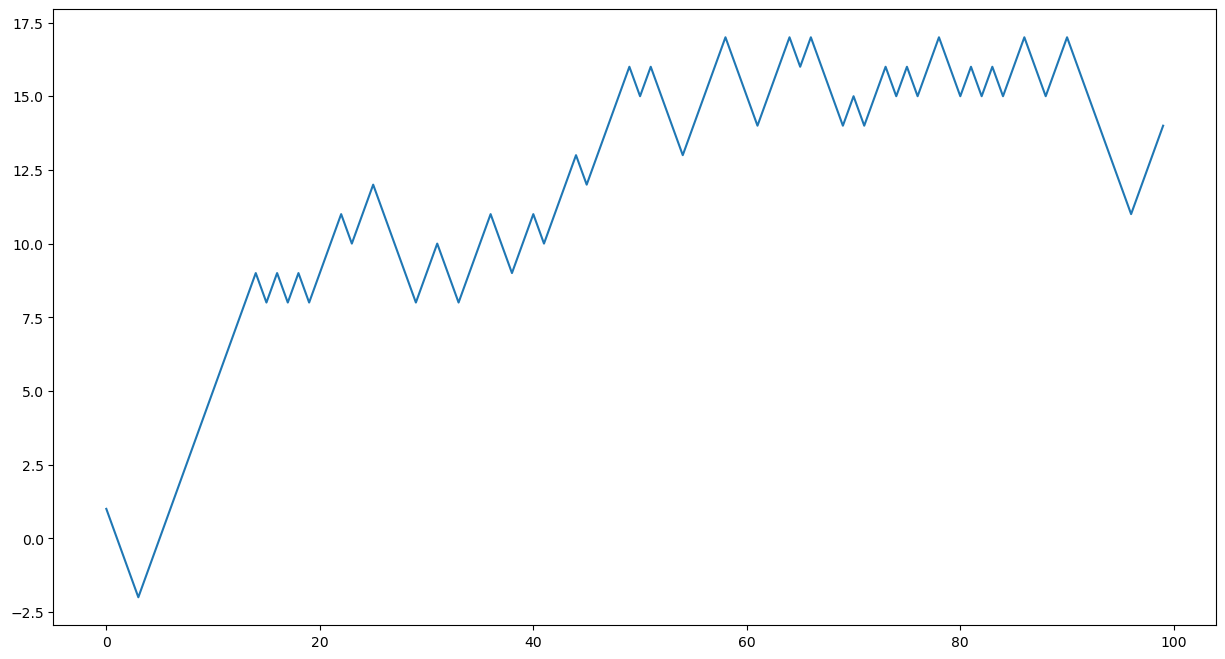

In [25]:
plt.plot(S);

A longer walk, of length 10,000:

In [26]:
n = 10000
X = rng.choice([-1, 1], size=n, replace=True)
S = np.cumsum(X)
S[:5], S[-5:]

(array([-1,  0, -1,  0,  1]), array([-130, -131, -130, -131, -132]))

Same plot as before, but for this longer walk.
For this one, the wiggles are much smaller and the path is much rougher:

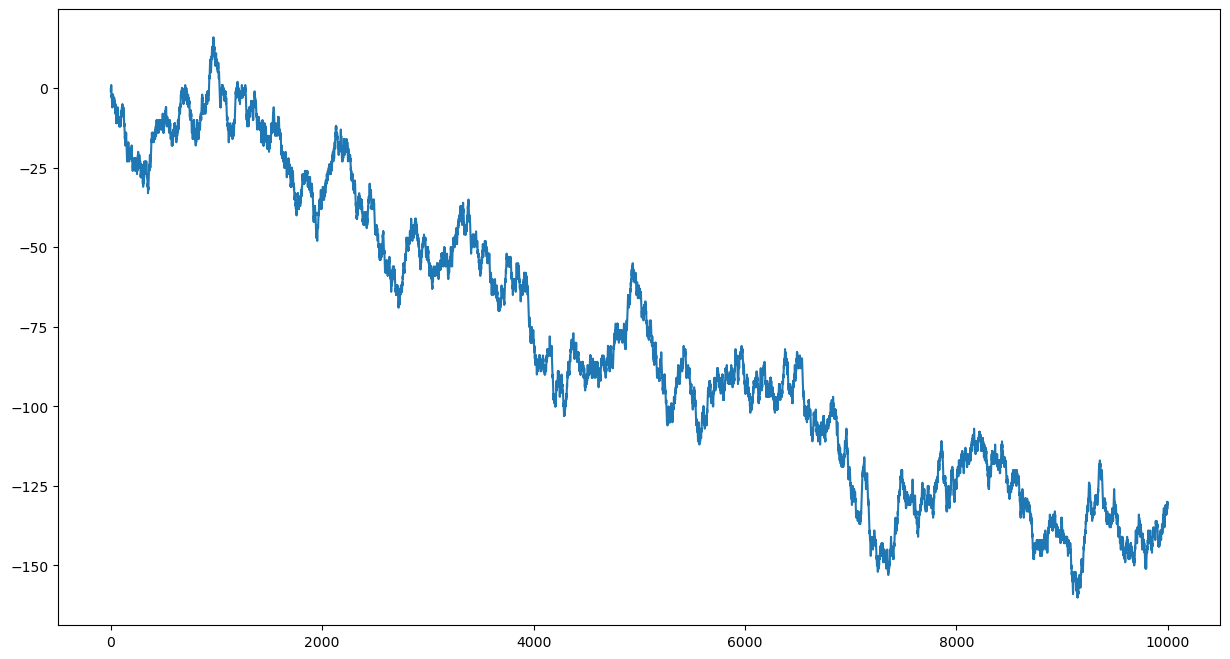

In [27]:
plt.plot(S);

Here's lots of walks, and only the distribution of $S_n$, i.e., where they end up.

In [28]:
def walks(n, size):
    X = rng.choice([-1, 1], size=(size, n))
    S = np.sum(X, axis=1)
    return S

In [29]:
n, size = 100, 5000
S = walks(n=n, size=size)
print(f"{size} walks of length n={n}: {len(np.unique(S))} distinct values; "
      f"{np.mean(S > np.sqrt(n)) * 100:.2f}% greater than sqrt(n)")

5000 walks of length n=100: 36 distinct values; 14.00% greater than sqrt(n)


A histogram of the final positions of those 5,000 walks,
which looks fairly normal but the discrete set of values is visible.

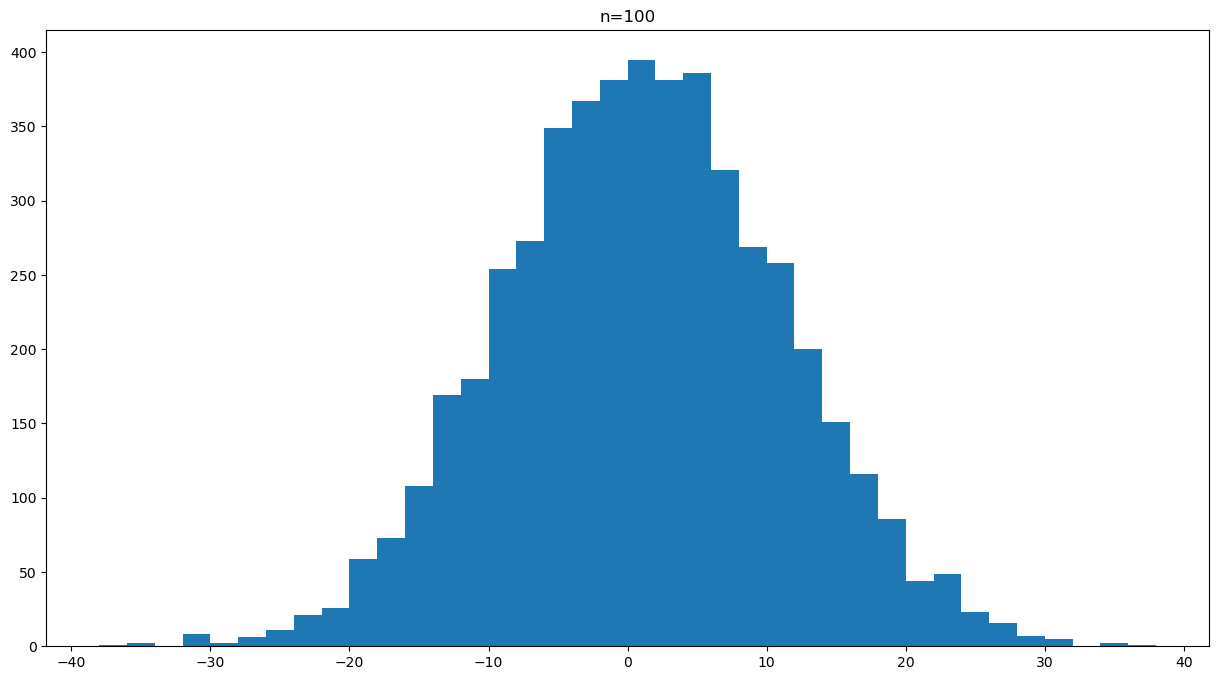

In [30]:
plt.hist(S, bins=dsci.pretty(S, 50))
plt.title(f"n={n}");

In [31]:
Slist = []
for k in range(6):
    n = 4 * (k+1)**2
    S = walks(n=n, size=5000)
    Slist.append((n, S))
    print(f"{size} walks of length n={n}: {len(np.unique(S))} distinct values; "
          f"{np.mean(S > np.sqrt(n)) * 100:.2f}% greater than sqrt(n)")

5000 walks of length n=4: 5 distinct values; 6.62% greater than sqrt(n)
5000 walks of length n=16: 14 distinct values; 11.04% greater than sqrt(n)
5000 walks of length n=36: 24 distinct values; 12.42% greater than sqrt(n)
5000 walks of length n=64: 29 distinct values; 13.82% greater than sqrt(n)
5000 walks of length n=100: 35 distinct values; 13.44% greater than sqrt(n)
5000 walks of length n=144: 44 distinct values; 13.76% greater than sqrt(n)


Histograms of the final positions of walks of various lengths:
for small $n$ the values look more triangular than Normal;
past $n=100$ the distribution looks continuous.

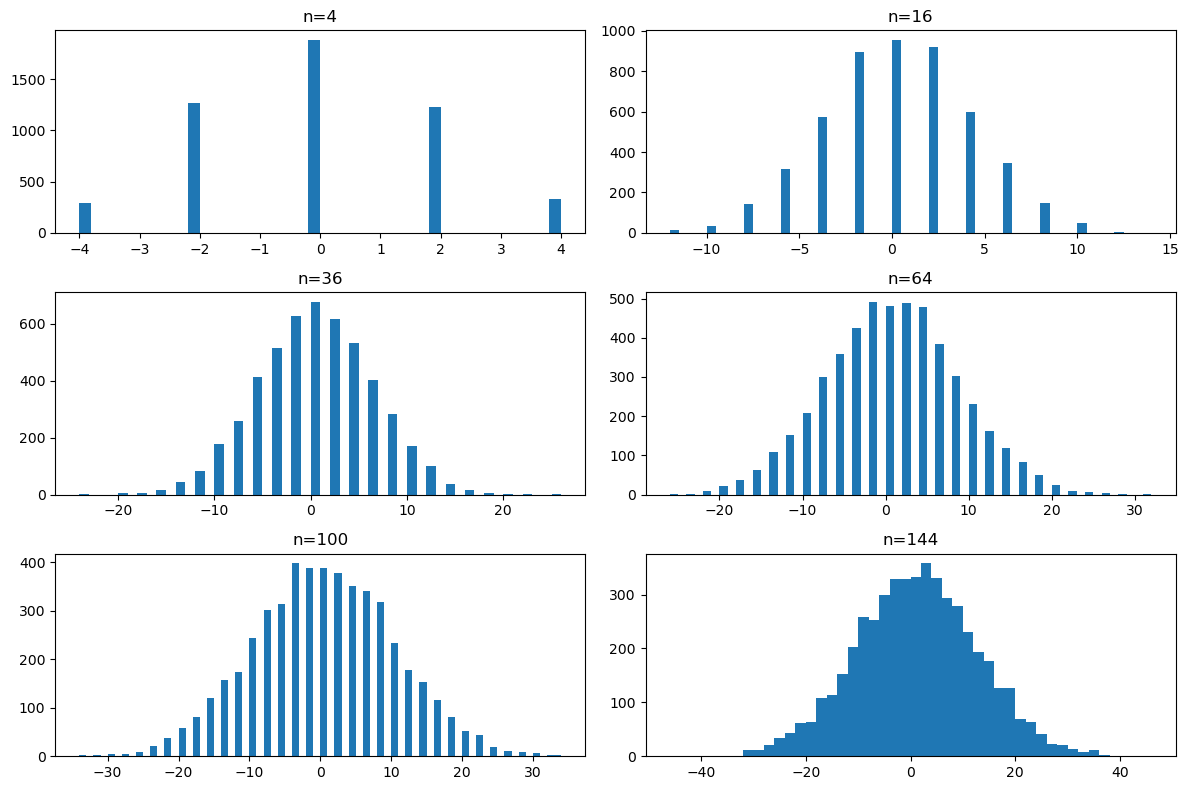

In [32]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
for k, ax in enumerate(axes.flatten()):
    n, S = Slist[k]
    ax.hist(S, bins=dsci.pretty(S, 50))
    ax.set_title(f"n={n}")
plt.tight_layout()

# Sums of exponentials

Let's say now that $X_1, X_2, \ldots$ are independent Exponential(1) random variables.
Their sum has mean $n$, so let's look at
 $$ S_n = X_1 + \cdots + X_n  - n . $$
Notice that
 $$ \bar X - 1 = \frac{1}{n} S_n . $$
 
*Exercise:* Make up a story for what $S_n$ is.

A line depicting the path of a random walk where increments are each "Exponential(1) minus 1"; it is less jagged and more "tilted to the left" than the previous random walk. 

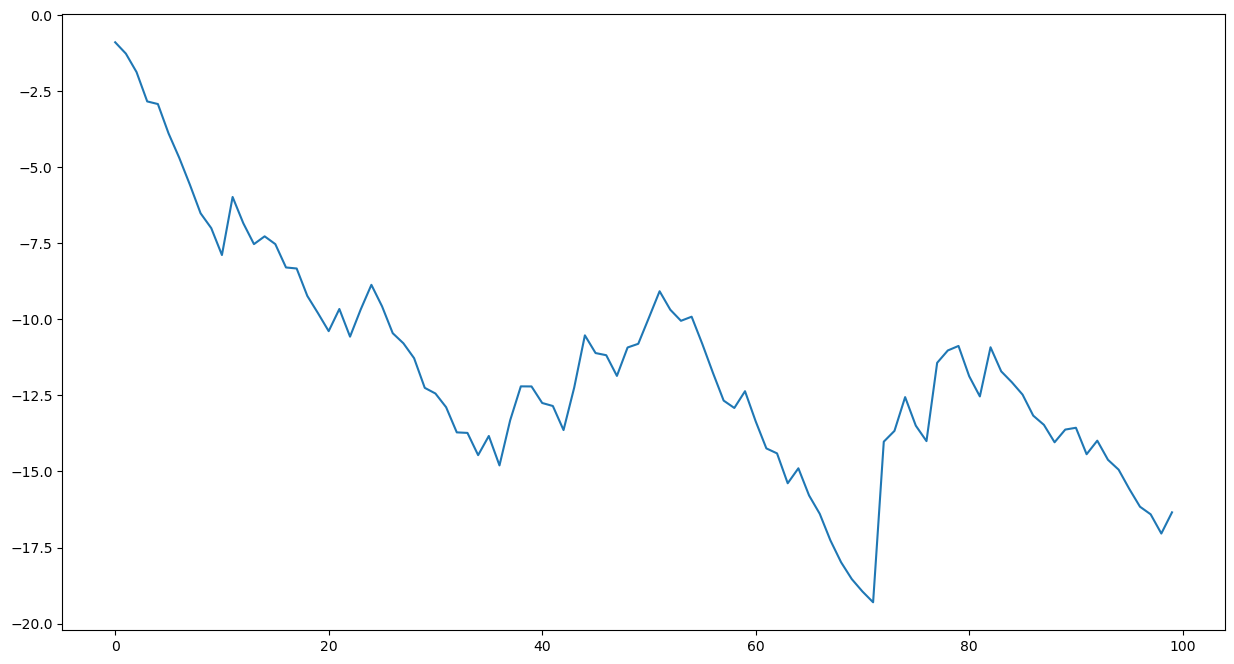

In [33]:
n = 100 
X = rng.exponential(1, size=n) - 1
S = np.cumsum(X)
plt.plot(S);

The same plot as previously, but for 1,000 steps instead of 100.
The plot looks less less "tilted".

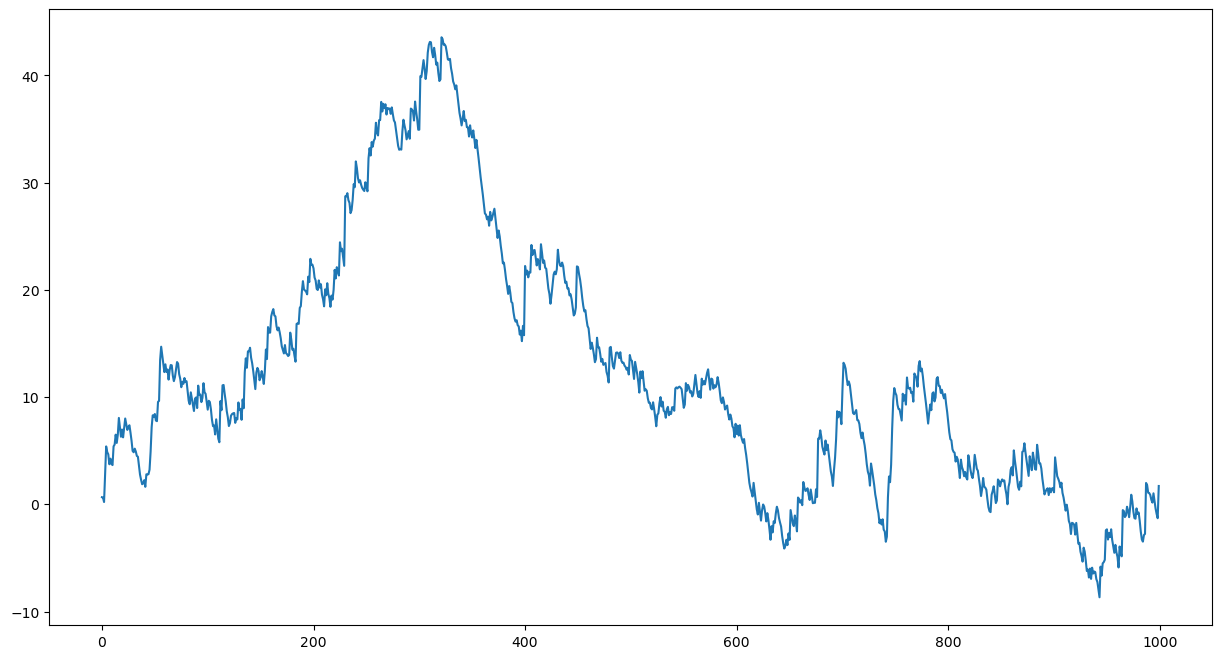

In [34]:
n = 1000
X = rng.exponential(1, size=n) - 1
S = np.cumsum(X)
plt.plot(S);

As before, histograms of the final positions of many walks of lengths between $n=2$ and $n=72$;
for small $n$, the histogram "leans left", with a long tail to the right.
For large $n$, the histogram is symmetric (and very Normal).

In [35]:
def exp_walks(n, size):
    X = rng.exponential(1, size=(size, n))
    S = np.sum(X, axis=1)
    return S

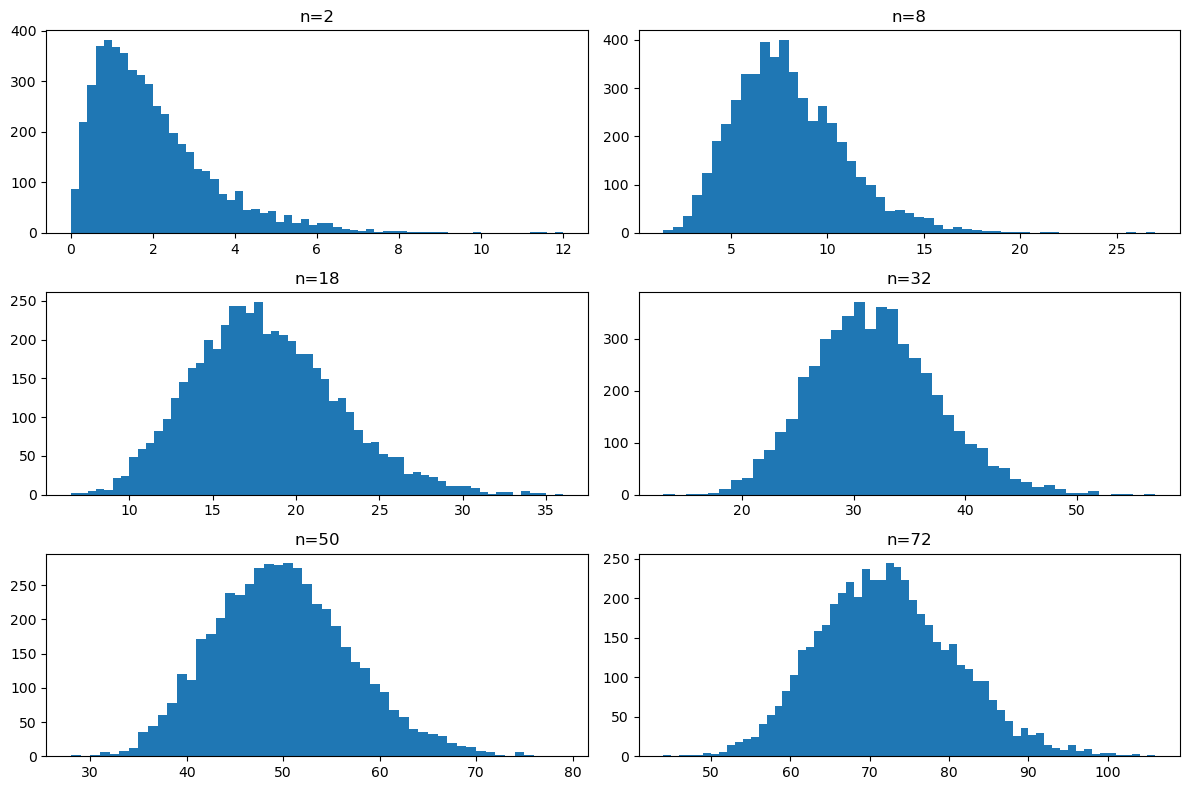

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
for k, ax in enumerate(axes.flatten()):
    n = 2 * (k+1)**2
    S = exp_walks(n=n, size=5000)
    ax.hist(S, bins=dsci.pretty(S, 50))
    ax.set_title(f"n={n}")
plt.tight_layout()

# Example: counting bikes

Suppose we are estimating bike lane usage
by counting bikes from 5-6pm every day at a particular spot.
If we do it for 25 days,
and the number per day has mean 120 with standard deviation 50,
how close will our average be to 120?

*Answer 1:* Well, $\bar X$ is the average number of bikes/day over $n=25$ days,
so we know that $\E[\bar X] = \mu = 120$ bikes,
and $\sd[\bar X] = \sigma / \sqrt{n} = 50 / \sqrt{25} = 10$ bikes...
so, within $\pm 20$ bikes or so?

*Answer 1:* Well, $\bar X - \mu$ is roughly Normally distributed,
so $|\bar X - \mu| < 20$ with probability 95.4\%.

In [37]:
from scipy.stats import norm
a = norm.cdf(x=100, loc=120, scale=10) # P(mean < 100)
b = 1 - norm.cdf(x=140, loc=120, scale=10) # P(mean > 140)
print(f"The probability the (sample) mean number of bikes per day over the 25 days "
      f" is between 100 and 140 is {1 - (a + b):.3f}.")

The probability the (sample) mean number of bikes per day over the 25 days  is between 100 and 140 is 0.954.


More precisely,
$$ \bar X \approx \text{Normal}(\text{mean}=120, \text{sd}=10) ,$$
so
$$
 \P\left\{
 | \bar X - 120 | > x
 \right\}
 \approx
 2 \int_{10x}^\infty \frac{e^{-y^2/2}}{\sqrt{2 \pi}} dy .
$$

# Example: jelly beans

Each bag of jelly beans has 100 beans in it.
The average weight per bag is 240g,
with and SD of 10g.
Bags weighing less than 210g can't be sold.
What percent of the bags are too light?

Well, if we assume that the distribution of weights of bags
is Normal, then this is the probability a Normal with mean 240g
and SD 10g is smaller than 210g,
which is 0.13\%.

In [38]:
norm.cdf(210, loc=240, scale=10)

np.float64(0.0013498980316300933)

Note what we did there - to answer the question, we needed
to know the *probability distribution* of $W$, which was not stated,
only the mean and SD!
So, we said that "gee since it's the sum of a bunch of things it's probably Normal".

Let's check that, by simulation.
Say $X_1, \ldots, X_{100}$ are the weights of the jelly beans.
We have that the mean of $X_i$ is 2.4g.
Also, the variance of the total weight is 100, so the variance of the weight per bean
(i.e., the variance of $X_i$) is 100 / 100 = 1.
So the standard deviation of $X_i$ is 1g.

We'll use an exponential distribution, because the mean is equal to the SD.

In [ ]:
bag_weights = np.array([np.sum(rng.exponential(scale=1, size=100)) for _ in range(10000)])
bag_weights

In [ ]:
np.mean(bag_weights), np.std(bag_weights)